# SHOP SMART

# Data Preparation and Exploration

## Importing the data

In [97]:
#import libraries
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, mean_squared_error
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Load CSV files into DataFrames
store = pd.read_excel(r"C:\Users\Yong Justice\OSC 2024 Summer Challenge Data Science Big Data\Online Retail.xlsx")

### Data Inspection

In [4]:
#Data_Inspection
store.shape
store.info()
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
#handle missing values
store["Description"].fillna(value='No Description', inplace=True)

In [15]:
store.dropna(inplace=True)

In [11]:
#Convert data types
store['InvoiceNo'] = pd.to_numeric(store['InvoiceNo'], errors='coerce')

In [17]:
store["InvoiceNo"]=store["InvoiceNo"].astype(int)
store["CustomerID"]=store["CustomerID"].astype(int)

In [122]:
#Create New Features
store["TotalSpent"]=store["Quantity"] * store["UnitPrice"]
store['PurchaseFrequency'] = store.groupby('CustomerID')['InvoiceNo'].transform('count')
store['Month'] = store['InvoiceDate'].dt.month
# Convert DayOfWeek (numeric) to DayName (string)
store['Day_of_the_week'] = pd.to_datetime(store['InvoiceDate']).dt.strftime('%A') 
store['Month_Name'] = pd.to_datetime(store['InvoiceDate']).dt.strftime('%B')
store["DayOfWeek"] = pd.to_datetime(store["InvoiceDate"]).dt.dayofweek

## Exploratory Data Analysis(EDA)

In [124]:
# Print object type, shape, and head
print("store type:", type(store))
print("store shape:", store.shape)
store.head()

store type: <class 'pandas.core.frame.DataFrame'>
store shape: (397924, 15)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,PurchaseFrequency,Month,Day_of_the_week,Month_Name,Cluster,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,297,12,Wednesday,December,0,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297,12,Wednesday,December,0,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,297,12,Wednesday,December,0,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297,12,Wednesday,December,0,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297,12,Wednesday,December,0,2


In [23]:
#Descriptive Statistics
store.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSpent,PurchaseFrequency,Month
count,397924.000000,397924.000000,397924,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394749,662.364597,7.612537
min,536365.000000,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000,1.000000,1.000000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,90.000000,5.000000
50%,561893.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,201.000000,8.000000
75%,572090.000000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,447.000000,11.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,7847.000000,12.000000
std,13106.167695,180.420210,NaN,22.096788,1713.169877,309.055588,1445.540972,3.416527


##### Univariate Analysis(Visuals)

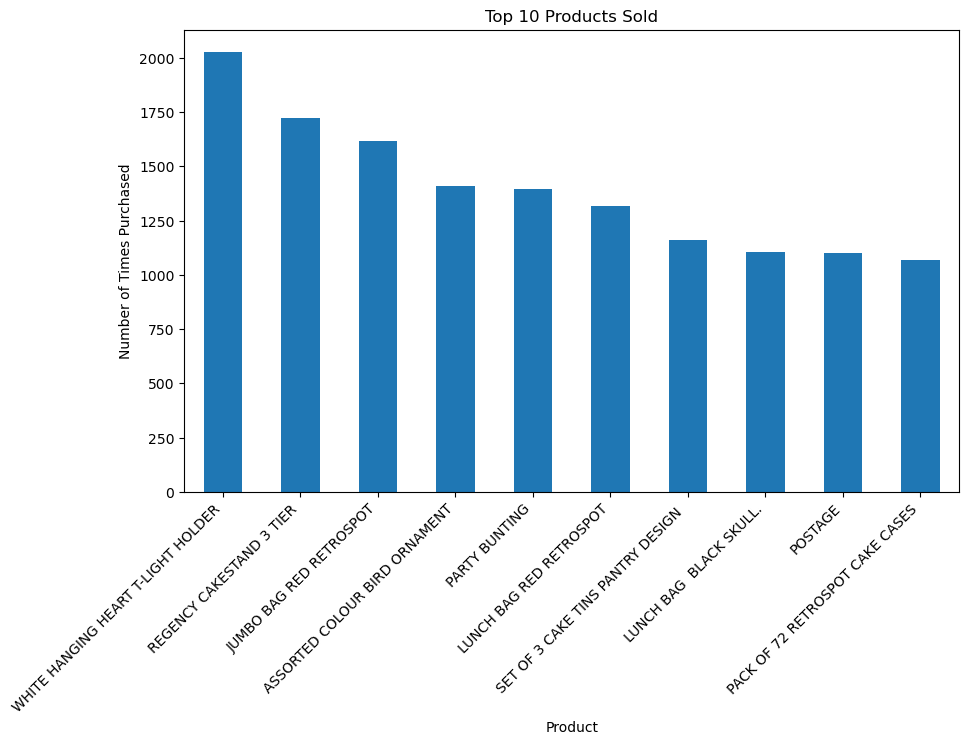

In [67]:
# Top 10 Products 
top_products = store['Description'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products Sold')
plt.xlabel('Product')
plt.ylabel('Number of Times Purchased')
plt.xticks(rotation=45, ha='right')
plt.show()

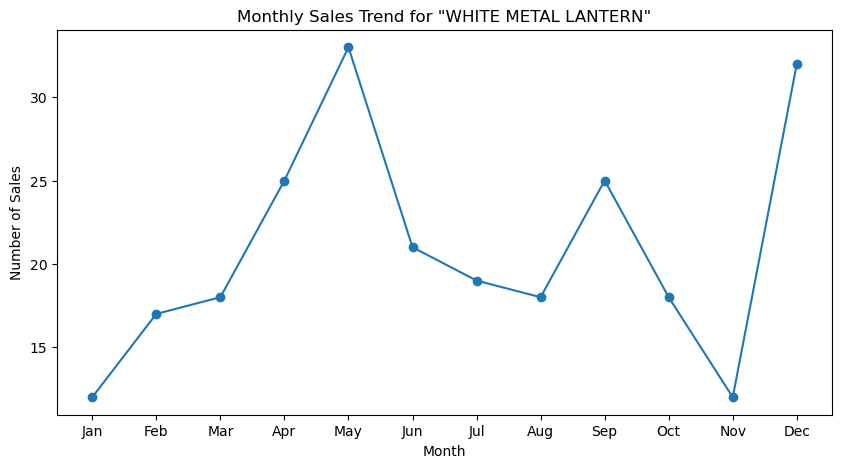

In [101]:
# Time-Based Product Trends
# Ensure datetime
store['InvoiceDate'] = pd.to_datetime(store['InvoiceDate']) 

# Monthly Trend of a Specific Product 
product_name = 'WHITE METAL LANTERN' 
product_data = store[store['Description'] == product_name]
monthly_trend = product_data.groupby(product_data['InvoiceDate'].dt.month).size()

plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='line', marker='o')
plt.title(f'Monthly Sales Trend for "{product_name}"')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                              'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
   


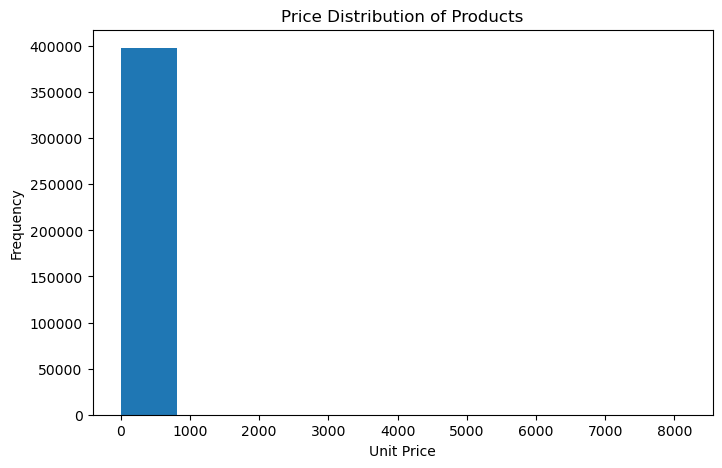

In [105]:

plt.figure(figsize=(8, 5))
plt.hist(store['UnitPrice'], bins=10)  

plt.title('Price Distribution of Products')
plt.xlabel('Unit Price')
plt.ylabel('Frequency') 



plt.show() 


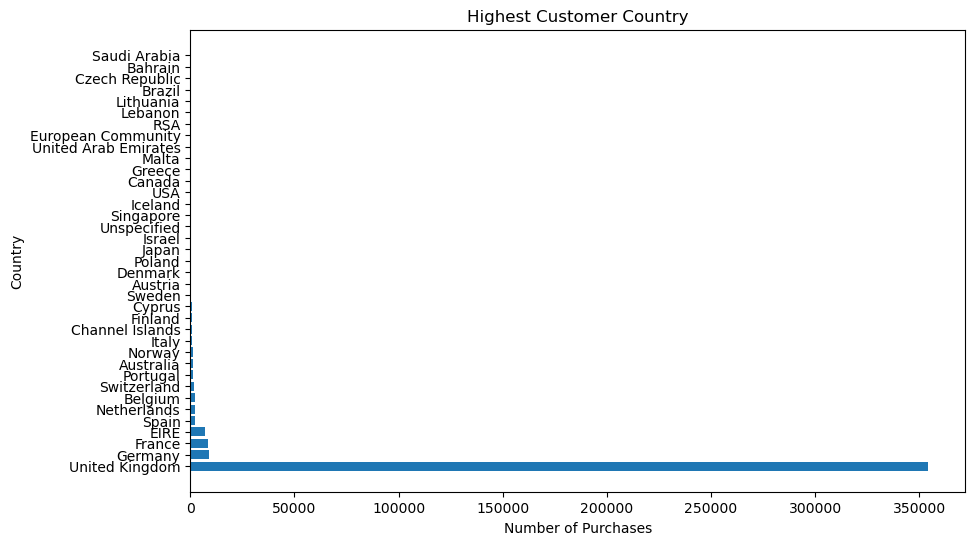

In [115]:

country_counts = store['Country'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(country_counts.index, country_counts.values)

plt.title('Highest Customer Country')
plt.xlabel('Number of Purchases')
plt.ylabel('Country')


plt.show()


## Build Model

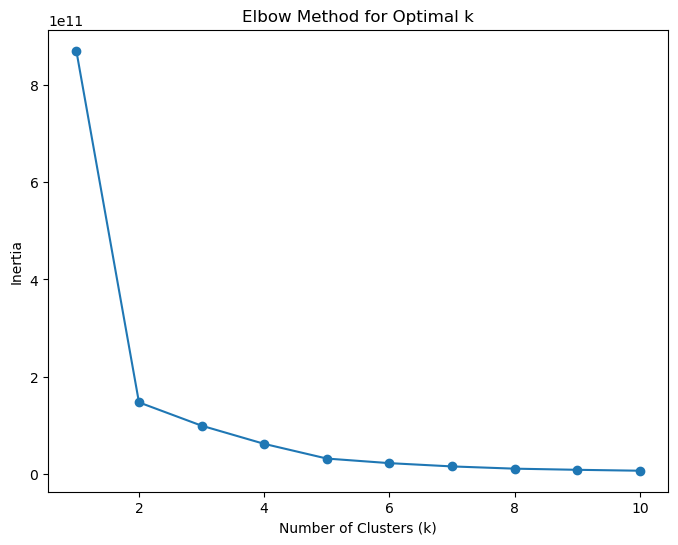

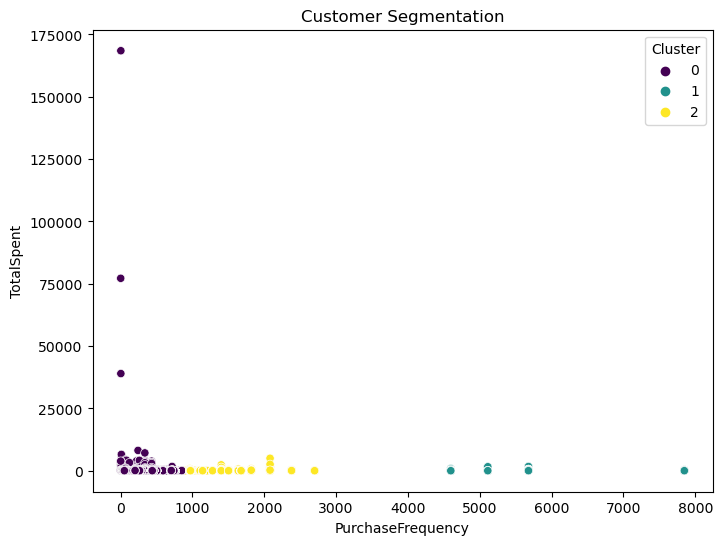

In [120]:
# Prepare data for clustering (select relevant features)
features_for_clustering = ['TotalSpent', 'PurchaseFrequency']
X = store[features_for_clustering]

# Determine optimal number of clusters (elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans clustering 
kmeans = KMeans(n_clusters=3, random_state=42) # Choose optimal k based on elbow method
store['Cluster'] = kmeans.fit_predict(X)

# Analyze and visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PurchaseFrequency', y='TotalSpent', hue='Cluster', data=store, palette='viridis')
plt.title('Customer Segmentation')
plt.show()


###  Predictive Modeling

In [129]:
 
#  I'll demonstrate regression

# Select features and target variable 
features = ['PurchaseFrequency', 'DayOfWeek', 'Month', 'Cluster'] 
target = 'TotalSpent'

X = store[features]
y = store[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model 
rmse = mean_squared_error(y_test, y_pred, squared=False) 
print('RMSE:', rmse) 

RMSE: 71.48830117573466


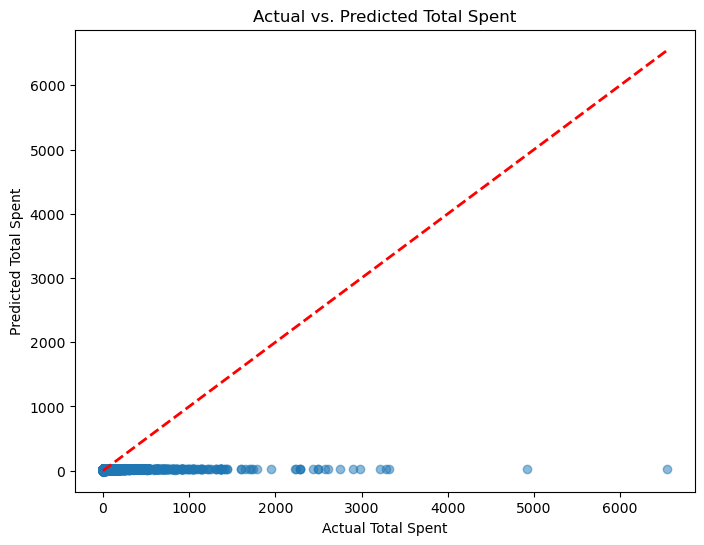

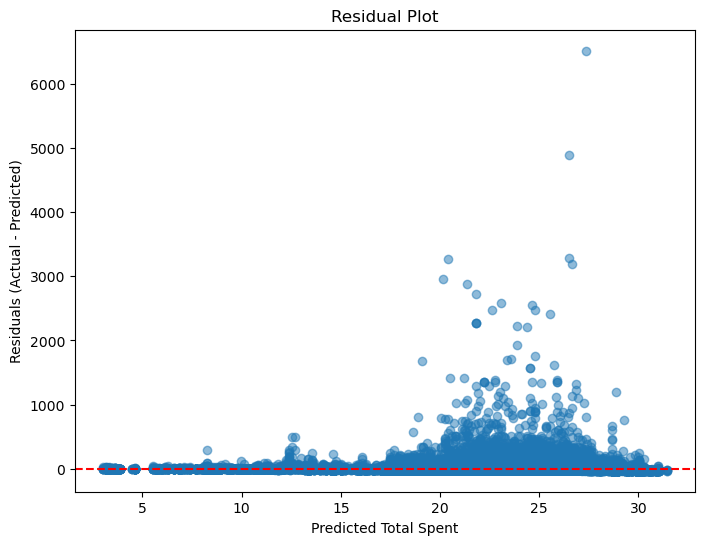

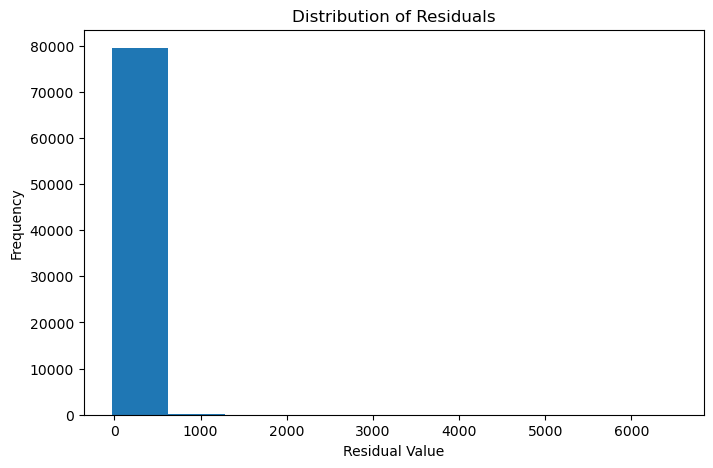

In [131]:
# 1. Predictions vs. Actual Values (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.xlabel('Actual Total Spent')
plt.ylabel('Predicted Total Spent')
plt.title('Actual vs. Predicted Total Spent')

#diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         linestyle='--', color='red', linewidth=2)
plt.show() 

# 2. Residual Plot (Analyzing Errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Total Spent')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.show()

# 3. Distribution of Residuals (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=10)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()


# Interpretation and Recommendations

##### This document presents the findings and recommendations derived from analyzing ShopSmart's customer data. We used Python along with libraries like Pandas, Matplotlib, and Scikit-learn to conduct our analysis.

1. Exploratory Data Analysis (EDA): Key Findings
 Top Products: We identified the top-selling products . This informs inventory management and potential promotional strategies.
Customer Spending: Describe the distribution of customer spending. Are there distinct groups of high and low spenders?
Popular Shopping Days/Times: Highlight any patterns in shopping days and times.  This is crucial for staffing and promotional scheduling.
Customer Segmentation

   We identified three distinct customer segments: 'Loyal Customers' who spend the most and shop frequently, 'Potential Customers' with moderate spending and frequency, and 'Infrequent Customers' with low engagement.  

2. Predictive Modeling (Regression Example):
Model Goal: aimed to predict the total amount a customer would spend based on features like purchase frequency and day of the week.
Model Performance: Report the RMSE value you obtained. A lower RMSE suggests better predictive accuracy.


3. Recommendations for ShopSmart

Based on our analysis, we recommend the following strategies to enhance ShopSmart's marketing efforts:
Targeted Promotions:
    Loyal Customers: Implement a loyalty program with exclusive discounts and early access to new products to retain this valuable segment. 
    Potential Customers: Design personalized recommendations and targeted promotions to encourage them to transition into more frequent shoppers. Consider free shipping offers or discounts on related products.
    Infrequent Customers: Conduct surveys to better understand their needs and preferences. Craft enticing entry-level promotions or bundle offers to attract their attention.
Optimize Operations:
    Staffing and Inventory: Adjust staffing levels and inventory based on identified peak shopping days and times to improve customer experience.
    Product Bundling:If you did co-purchase analysis, recommend relevant product bundles to increase sales.
Personalized Marketing:
    Leverage customer segmentation insights to personalize marketing messages and product recommendations. Consider email campaigns tailored to specific customer segments' interests. 
Further Exploration:
    Price Sensitivity:Analyze if and how price influences purchasing decisions.  
    Customer Lifetime Value: Predict customer lifetime value to allocate marketing resources more efficiently. 
    Channel Optimization:If you have data on marketing channels, analyze their effectiveness. 

4. Conclusion

This data-driven analysis provides valuable insights into ShopSmart's customer behavior and offers actionable recommendations to optimize marketing strategies. By implementing these recommendations, ShopSmart can enhance customer engagement, increase sales, and drive business growth.


#### Analyses for ShopSmart 
#### OSC Challenge
###### Yong Justice Animbom Numfor